# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [3]:
pip install pandas

  Using cached pandas-2.2.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp311-cp311-macosx_10_9_x86_64.whl (12.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl (55.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python==4.8.1.78


  Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl.metadata (19 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl (54.7 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.9.0.80
    Uninstalling opencv-python-4.9.0.80:
      Successfully uninstalled opencv-python-4.9.0.80
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 582.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 698.1 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 5.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread


import matplotlib.pyplot as plt


2024-03-08 21:24:38.852306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Create a function that will capture and save the image from your webcam

In [3]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [4]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [5]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "/Users/eujean/Desktop/HOA2/dog.png"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

Changed waitThread to realtime priority!
Asked for all format descriptions...


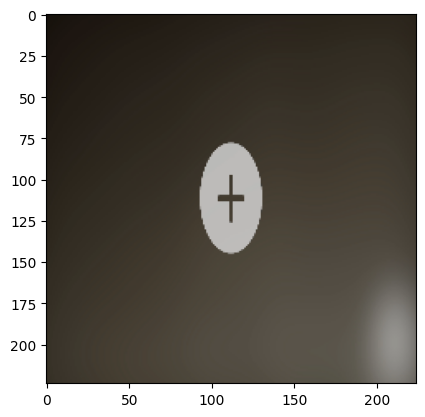

In [6]:
img = Image.open(img_path)
plt.imshow(img)

In [8]:
plt.imshow(imread(img_path))

NameError: name 'imread' is not defined

Use VGG-16 pre-trained model

In [7]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)

Create a function to load model, image, preprocess input and targets

In [ ]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [ ]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

Interpret the result of prediction using VGG16 model

#type your answer here

Use Resnet50 pretrained model

In [ ]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Predict the result

In [ ]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

Interpret the result using RESNET50 pretrained model

#type your answer here

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

In [ ]:
#### type your code here

#### Conclusion

#type your answer here